In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [7]:
pT_values = np.linspace(0.1, 10, 100)

dq = 0.05/np.sqrt(3/(2*np.pi))
nsteps = round(np.log(100)/dq)
qs = np.linspace(0, np.log(100), nsteps)
Q_values = np.sqrt(np.exp(qs))

fb_kins = dijet.Kinematics(z=0.4, x=0.01)

pT_grid = np.zeros((100, nsteps))
Q_grid = np.zeros((100, nsteps))

# models = ['gauss', 'exp']
# models = ['none', 'gauss']
models = ['gauss']
# model_values = {
#     'gauss': [[0.0], [0.1], [0.2], [0.5]],
#     'exp': [[0.0], [0.1], [0.2], [0.5]]
#     # 'skin': [[0.0, 1.0], [1.0, 0.5], [2.0, 0.5], [3.0, 0.5]]
# }
model_values = {
    'gauss': [[0.4]],
    'exp': [[0.0], [0.1], [0.2], [0.5]]
    # 'skin': [[0.0, 1.0], [1.0, 0.5], [2.0, 0.5], [3.0, 0.5]]
}

djs = {mod: [] for mod in models}
for mod in models:
    for value in model_values[mod]:
        djs[mod].append(dijet.DIJET(constrained_moments=True, fit_type='pp', IR_reg=[mod,*value]))

fb_values = {mod: [] for mod in models}
for mod in models:
    for iv in range(len(djs[mod])):
        print(mod, iv)
        fb_values_tmp = {}
        amps = ['N', 'Qu', 'Qd', 'Qs', 'G2', 'I3u', 'I3d', 'I3s', 'I4', 'I5']
        for amp in amps: fb_values_tmp[amp] = np.zeros((100, nsteps))
        
        for i, pT in enumerate(pT_values):
            for j, Q in enumerate(Q_values):
        
                pT_grid[i,j] = pT
                Q_grid[i,j] = Q*np.sqrt(0.4*(1-0.4))
        
                fb_kins.pT = pT
                fb_kins.Q = Q
        
                for amp in amps:
                    if amp == 'N': fb_values_tmp[amp][i,j] = djs[mod][iv].fourier_bessel(fb_kins, [[0,0,0,0]], amp)
                    else: fb_values_tmp[amp][i,j] = djs[mod][iv].fourier_bessel(fb_kins, [[1,1,0,0]], amp)

        fb_values[mod].append(fb_values_tmp)
        

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp.csv
--> loaded random moment params from /dipoles/moment_params_pp_oam3_range10.csv
--> loaded replica 1
gauss 0


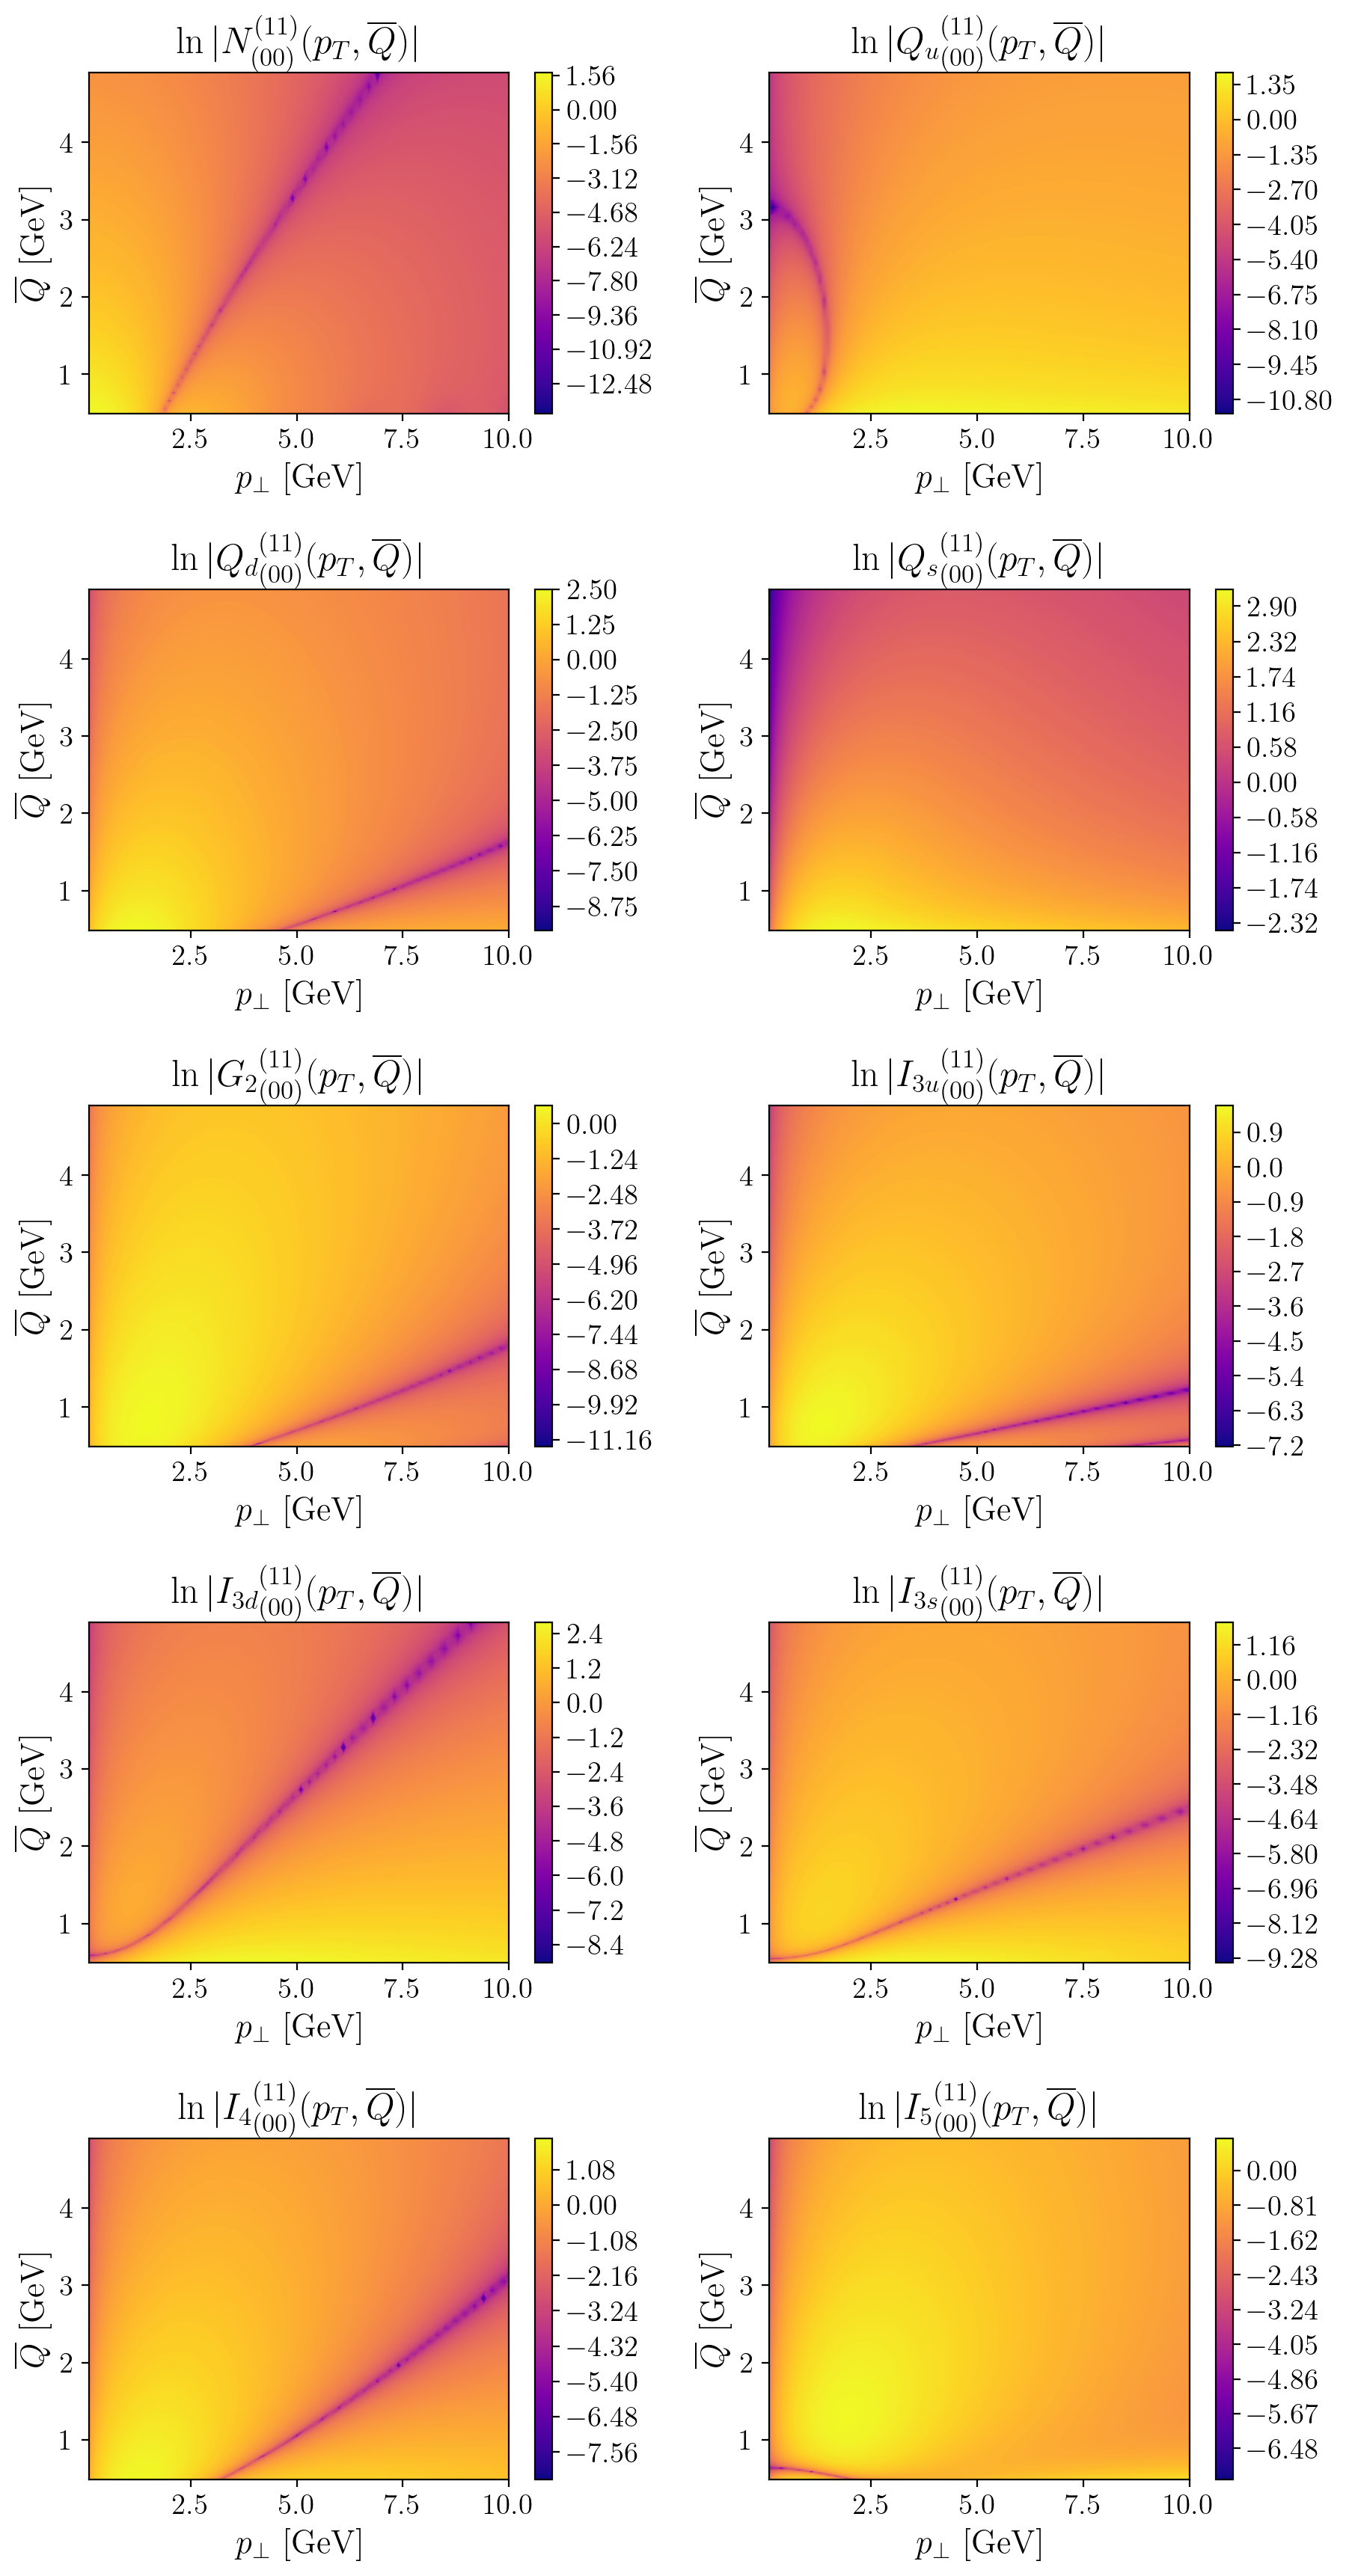

In [9]:
# make fb contour plot
asp_ratio = 4/3
psize = 3.5
nrows, ncols = 5,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))
axs = [(i,j) for i in range(nrows) for j in range(ncols)]

amp_strs = {
    'N': 'N',
    'Qu': 'Q_u', 'Qd': 'Q_d', 'Qs':'Q_s', 'G2':'G_2', 'I3u':'I_{{3u}}', 
    'I3d':'I_{{3d}}', 'I3s':'I_{{3s}}', 'I4':'I_{{4}}', 'I5':'I_{{5}}'
    }
for ia, amp in enumerate(amps):
    contour = ax[axs[ia]].contourf(pT_grid, Q_grid, np.log(np.abs(fb_values['gauss'][0][amp])), levels=300, cmap='plasma') 
    cbar = fig.colorbar(contour, ax=ax[axs[ia]])
    ax[axs[ia]].set_xlabel(r'$p_\perp \,\,[\mathrm{GeV}]$')
    ax[axs[ia]].set_ylabel(r'$\overline{Q} \,\,[\mathrm{GeV}]$')
    ax[axs[ia]].set_title(fr'$\ln|{{{amp_strs[amp]}}}^{{(11)}}_{{(00)}} (p_T, \overline{{Q}})|$')

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

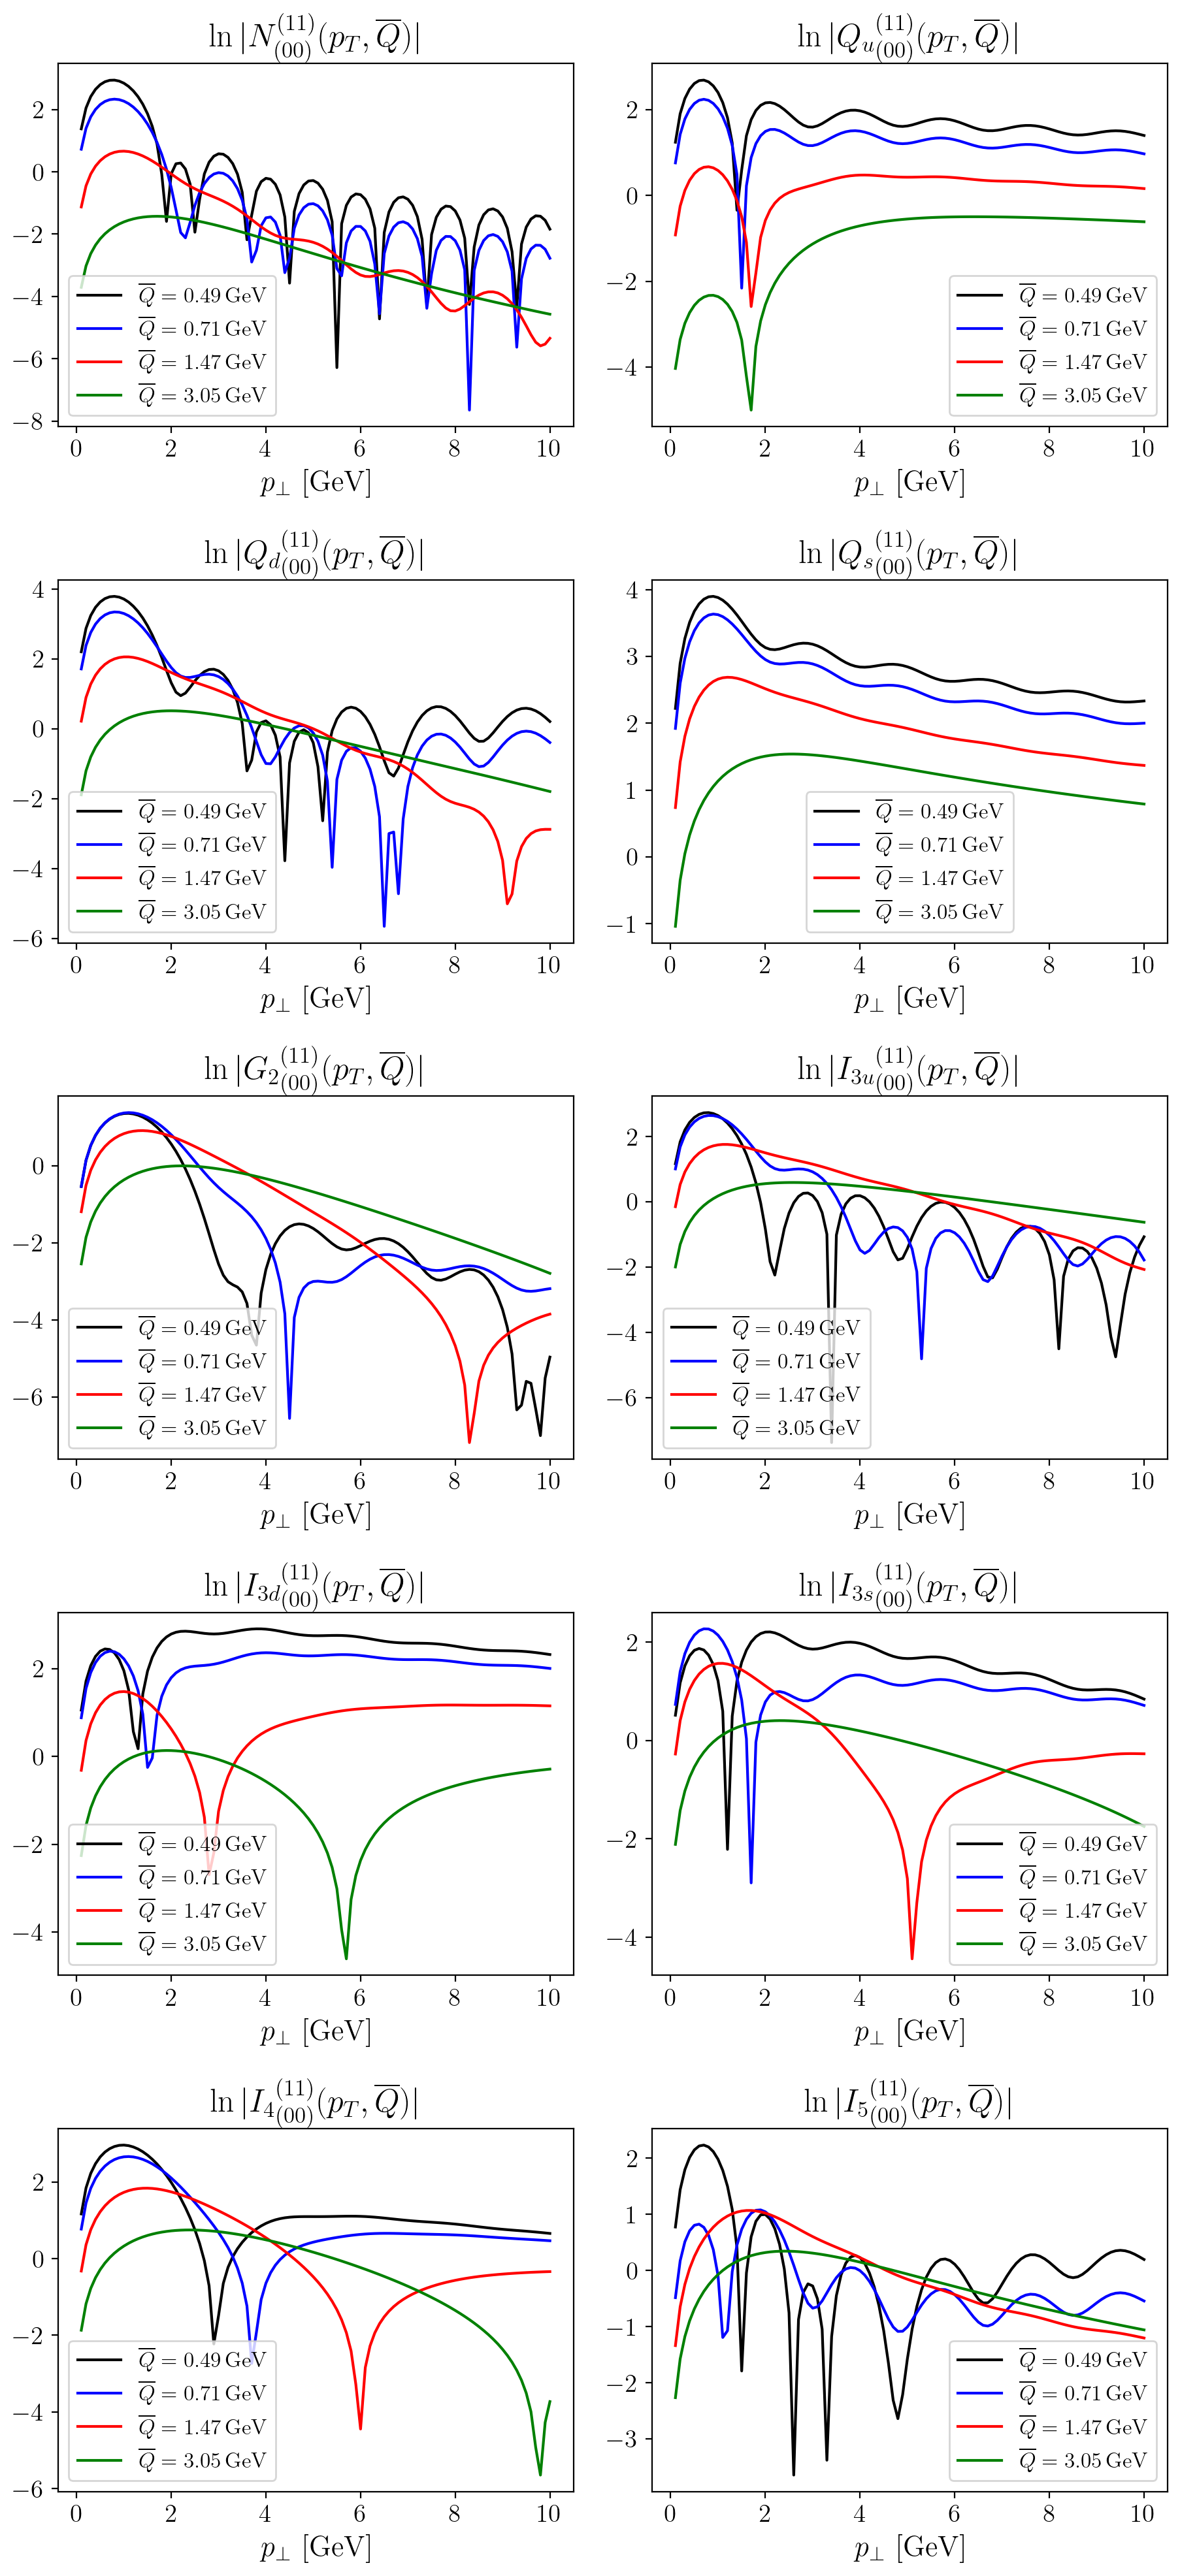

In [34]:
# make fb slice plots
asp_ratio = 3.5/3
psize = 4
nrows, ncols = 5,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))
axs = [(i,j) for i in range(nrows) for j in range(ncols)]
amp_strs = {
    'N': 'N',
    'Qu': 'Q_u', 'Qd': 'Q_d', 'Qs':'Q_s', 'G2':'G_2', 'I3u':'I_{{3u}}', 
    'I3d':'I_{{3d}}', 'I3s':'I_{{3s}}', 'I4':'I_{{4}}', 'I5':'I_{{5}}'
    }
colors = ['black', 'blue', 'red', 'green']
for iamp, amp in enumerate(amps):
    for iQ, j in enumerate([0,10,30,50]):
        ax[axs[iamp]].plot(pT_grid[:,0], np.log(np.abs(fb_values['gauss'][0][amp][:,j])), color=colors[iQ], label=rf'$\overline Q =  {round(Q_grid[0,j], 2)} \, \mathrm{{GeV}}$') 

    ax[axs[iamp]].set_xlabel(r'$p_\perp \,\,[\mathrm{GeV}]$')
    ax[axs[iamp]].set_title(fr'$\ln|{{{amp_strs[amp]}}}^{{(11)}}_{{(00)}} (p_T, \overline{{Q}})|$')
    ax[axs[iamp]].legend()
    
# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()



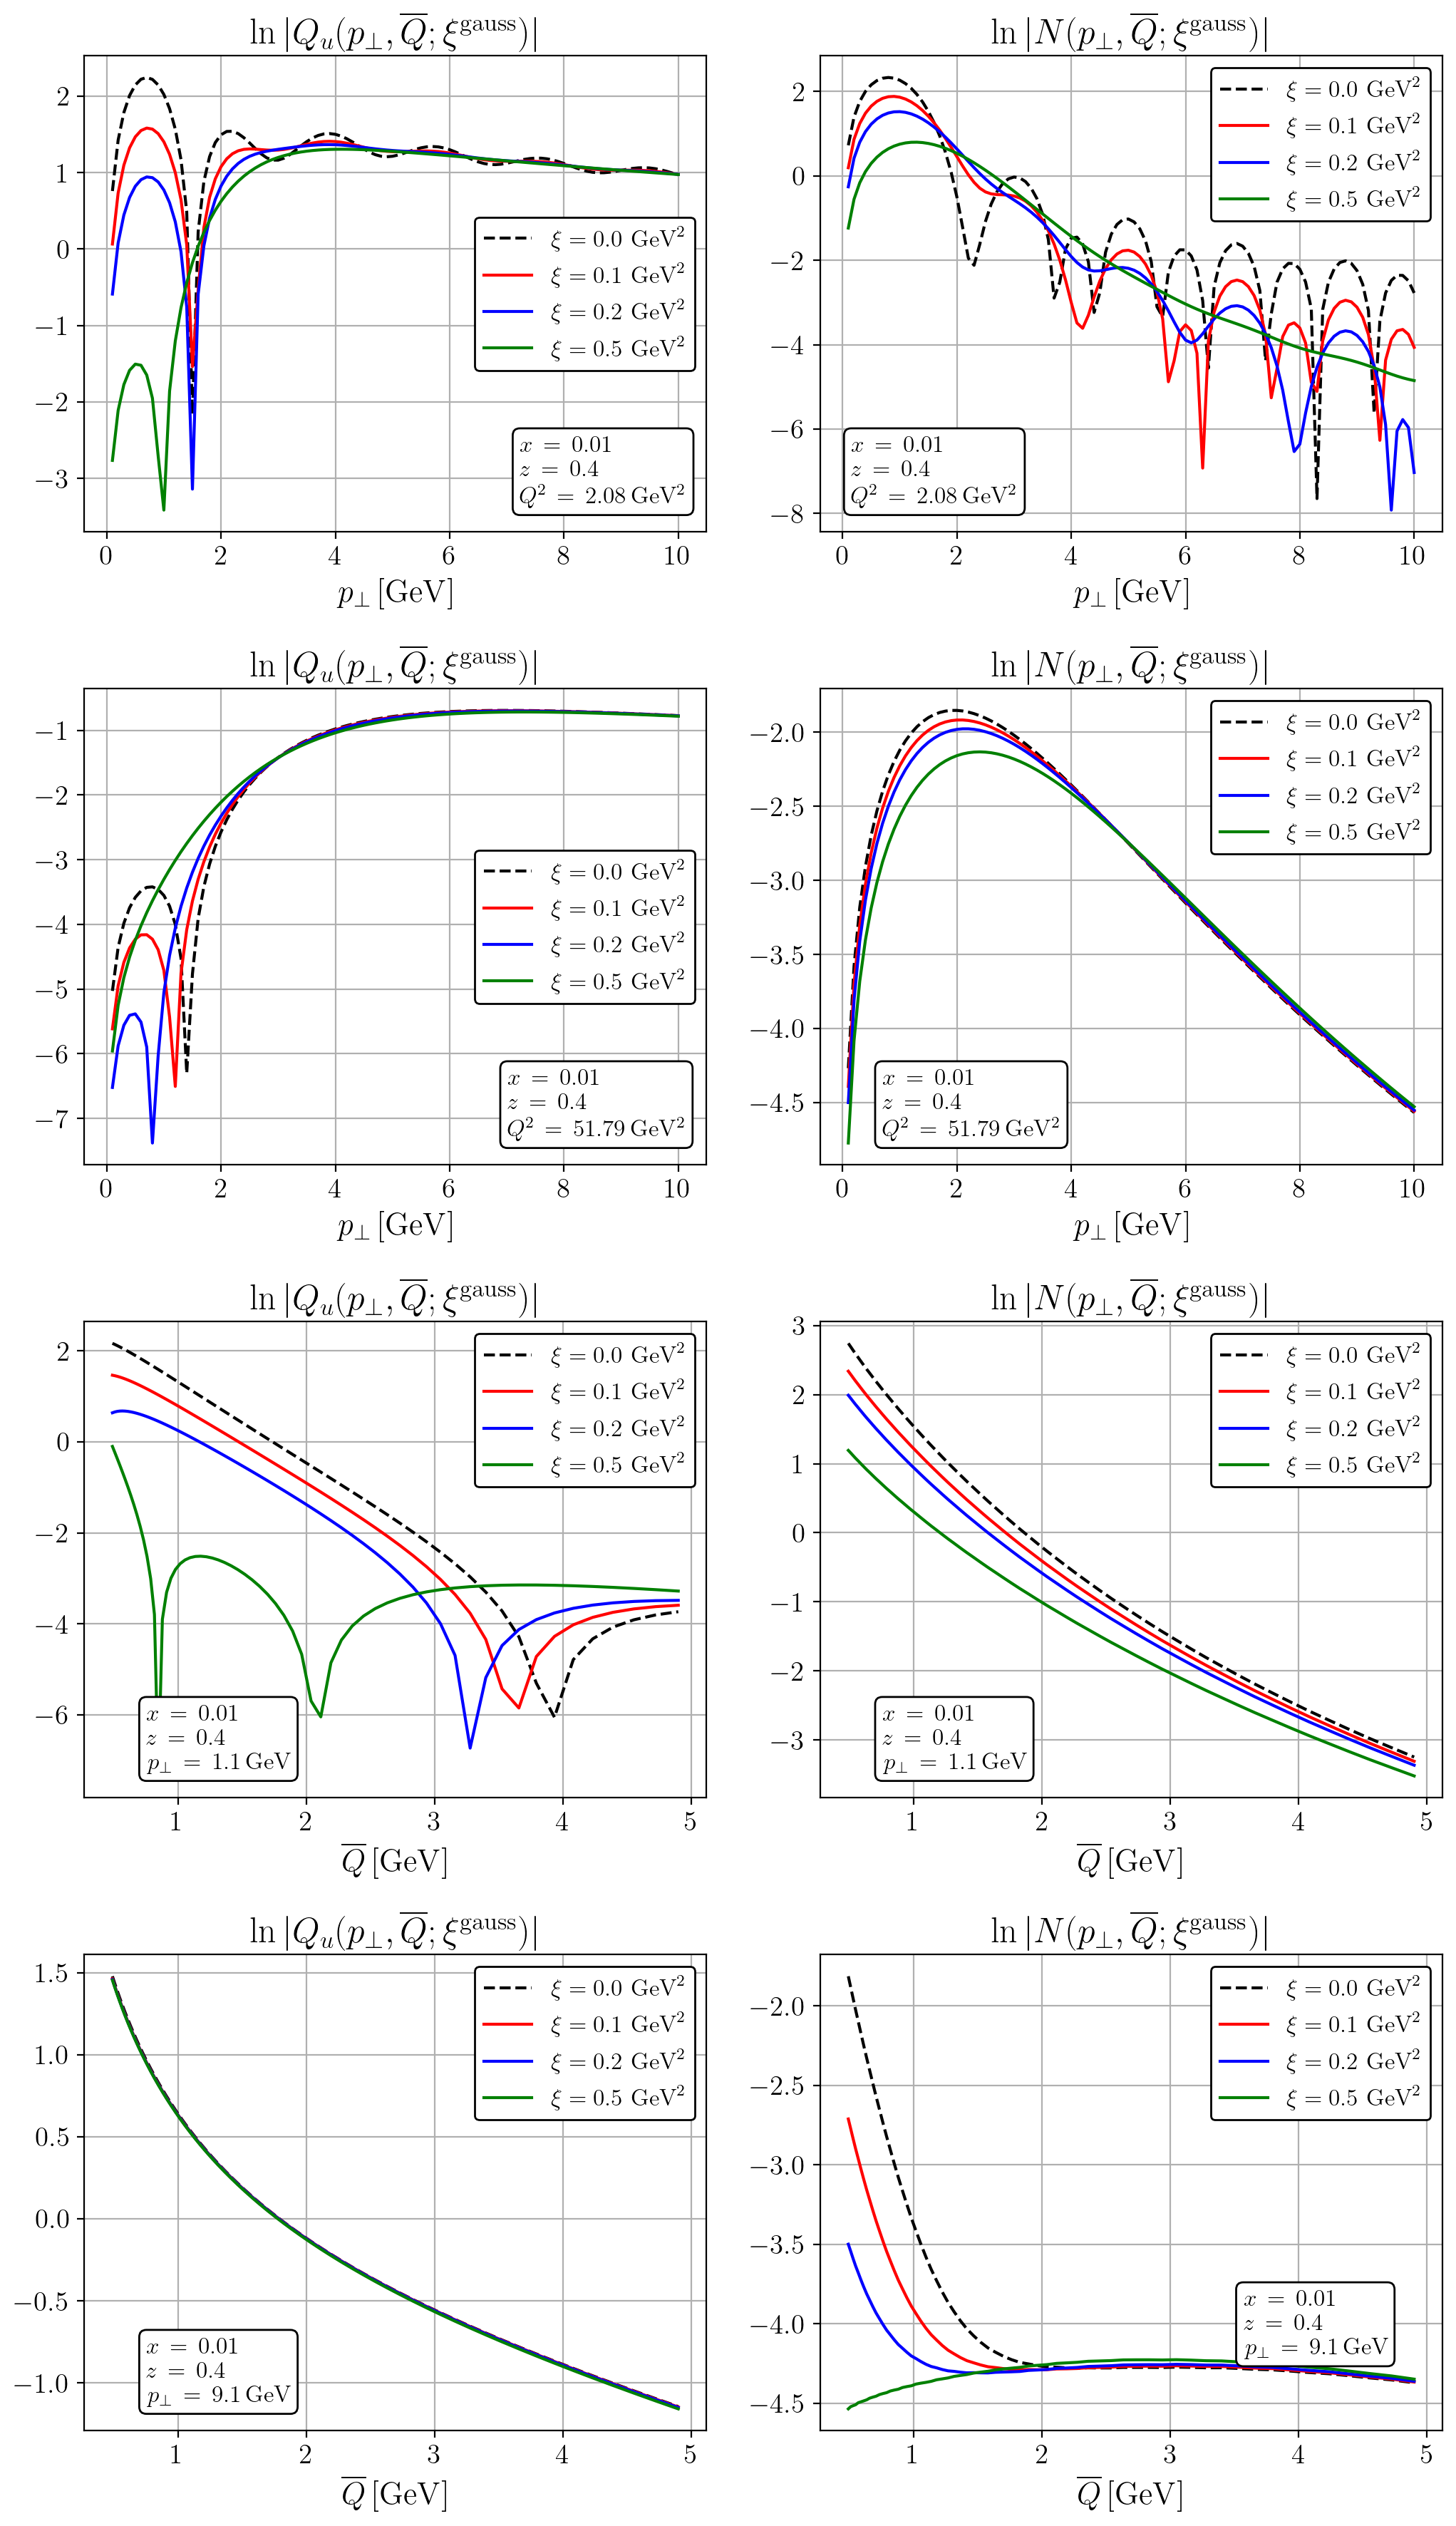

In [33]:
# make kinematics text
lvar = ['lowQ', 'highQ','lowpT','highpT']
info_text = {var: '' for var in lvar}

iv = 10
model = 'gauss'
for var in lvar:
    if 'low' in var: i = iv
    else: i = -iv
        
    info_text[var] = fr'$x \, = \,{round(fb_kins.x, 3)}$' + '\n'
    info_text[var] += fr'$z \, = \,{round(fb_kins.z, 3)}$' + '\n'
    if 'Q' in var:
        info_text[var] += fr'$Q^2 \, = \,{round(Q_values[i]**2, 2)}\, \mathrm{{GeV^2}}$'
    else:
        info_text[var] += fr'$p_\perp \, = \,{round(pT_values[i], 2)}\, \mathrm{{GeV}}$'


# IR regulator plots
asp_ratio = 3.5/3
psize = 4.5
nrows, ncols = 4, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

colors = ['black', 'red', 'blue', 'green', 'orange', 'black']
linestyles = ['--', '-', '-', '-', '-']

for ixi, xi in enumerate(model_values[model]):
    for ivar, var in enumerate(lvar):
        for iamp, amp in enumerate(['Qu', 'N']):
            if var == 'lowQ':
                x_values = pT_values
                y_values = fb_values[model][ixi][amp][:, iv]
            elif var == 'highQ':
                x_values = pT_values
                y_values = fb_values[model][ixi][amp][:, -iv]
            elif var == 'lowpT':
                x_values = np.sqrt(0.4*(1-0.4))*Q_values
                y_values = fb_values[model][ixi][amp][iv]
            elif var == 'highpT':
                x_values = np.sqrt(0.4*(1-0.4))*Q_values
                y_values = fb_values[model][ixi][amp][-iv]
                
            ax[ivar, iamp].plot(x_values, np.log(np.abs(y_values)), label = fr'$\xi = {xi[0]}\,\, \mathrm{{GeV}}^{{2}}$', color=colors[ixi], linestyle=linestyles[ixi])


info_pos = np.array([
    [[0.7, 0.05], [0.05, 0.05]],
    [[0.68, 0.05], [0.1, 0.05]],
    [[0.1, 0.05], [0.1, 0.05]],
    [[0.1, 0.05], [0.68, 0.15]]
    ])

for i, var in enumerate(lvar):

    if 'Q' in var: lab = 'p_\perp'
    else: lab = '\overline{Q}'
        
    ax[i, 0].set_xlabel(fr'${lab}\, [\mathrm{{GeV}}]$')
    ax[i, 0].set_title(fr'$\ln| Q_u(p_\perp, \overline{{Q}}; \xi^\mathrm{{{model}}})|$')
    ax[i, 0].legend(frameon=True, framealpha=1.0, edgecolor='black')
    # ax[i, 0].semilogx()
    ax[i, 0].text(
        info_pos[i,0,0], info_pos[i,0,1], info_text[var], 
        transform=ax[i,0].transAxes,
        ha='left', va='bottom', 
        fontsize=12, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
    )
    ax[i,0].grid(True)
    
    ax[i,1].set_xlabel(fr'${lab}\, [\mathrm{{GeV}}]$')
    ax[i,1].set_title(fr'$\ln| N(p_\perp, \overline{{Q}}; \xi^\mathrm{{{model}}})|$')
    ax[i,1].legend(frameon=True, framealpha=1.0, edgecolor='black')
    # ax[i,1].semilogx()
    ax[i,1].text(
        info_pos[i,1,0], info_pos[i,1,1], info_text[var], 
        transform=ax[i,1].transAxes,
        ha='left', va='bottom', 
        fontsize=12, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
    )
    ax[i,1].grid(True)

plt.tight_layout()
plt.show()

fig.savefig(f"plots/fb_{model}_x{fb_kins.x}.png")



In [1]:
fb_values

NameError: name 'fb_values' is not defined